# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Albert Kabore

Link to GitHub: https://github.com/albertokabore/Albert_Final_Module_7_article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [291]:
# Import and test necessary packages

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from spacytextblob.spacytextblob import SpacyTextBlob


!pip list

print('All prereqs installed.')

Package                   VersionAll prereqs installed.

------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm    

### Question 1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

Retrieve and Save the HTML Content: Utilize Python to fetch the article's HTML content and save it to a file. Here's how:

In [292]:

# URL of the NIH article on Type 2 Diabetes
url = 'https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/type-2-diabetes'

# Send a GET request to fetch the HTML content
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Save the HTML content to a file
with open('type_2_diabetes_article.html', 'w', encoding='utf-8') as file:
    file.write(response.text)

print("HTML content saved to 'type_2_diabetes_article.html'")

HTML content saved to 'type_2_diabetes_article.html'


Parse and Extract Text from the HTML: After saving the HTML, use BeautifulSoup to parse and extract the main text content:

In [293]:

# Load the saved HTML file
with open('type_2_diabetes_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract text from specific HTML elements (e.g., paragraphs)
article_text = ''
for paragraph in soup.find_all('p'):
    article_text += paragraph.get_text() + '\n'

# Save the extracted text to a new file
with open('type_2_diabetes_article.txt', 'w', encoding='utf-8') as file:
    file.write(article_text)

print("Extracted text saved to 'type_2_diabetes_article.txt'")


Extracted text saved to 'type_2_diabetes_article.txt'


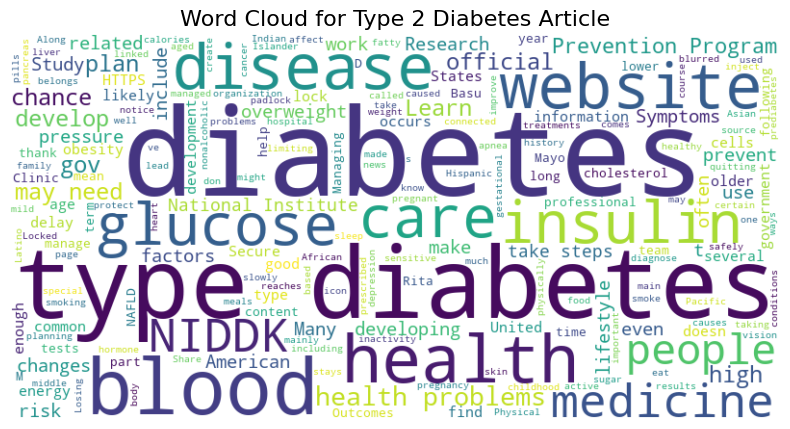

In [305]:
# Load the extracted text
with open('type_2_diabetes_article.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title('Word Cloud for Type 2 Diabetes Article', fontsize=16)
plt.show()

### Question 2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [294]:
# Fetch the HTML content from the URL
url = 'https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/type-2-diabetes'
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful
html_content = response.text

# Save the HTML content to a file
file_path = 'type_2_diabetes_article.html'
with open(file_path, 'w', encoding='utf-8') as file:
    file.write(html_content)

print(f"HTML content saved to '{file_path}'")

#  Parse the HTML and extract the text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Print the extracted article content
print("\nExtracted Article Text:\n")
print(article_text)

# Load SpaCy and add SpaCyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Perform sentiment analysis on the text
doc = nlp(article_text)
polarity = doc._.blob.polarity

# Determine the sentiment label
if polarity > 0:
    sentiment_label = "Positive"
elif polarity < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

# Print the polarity score with an appropriate label
print(f"\nPolarity score: {polarity:.2f} ({sentiment_label})")

# Count the number of sentences in the text
num_sentences = len(list(doc.sents))
print(f"Number of sentences in the article: {num_sentences}")


HTML content saved to 'type_2_diabetes_article.html'

Extracted Article Text:







Type 2 Diabetes - NIDDK












































Skip to main content










An official website of the United States government
Here’s how you know


Here’s how you know





Official government website icon


Official websites use .gov

                        A .gov website belongs to an official government organization in the United States.
                    



icon-https


Secure .gov websites use HTTPS

                        A lock (
                        

Lock
Locked padlock icon



                        ) or https:// means you’ve safely connected to the .gov website. Share sensitive information only on official, secure websites.
                    


















Search
Menu



Search for Information from NIDDK




Entire Site
Research & Funding
Health Information
News
About NIDDK



Search








Home







Research & Funding
Expand Research & Funding






### Question 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [295]:

# Step 4: Text cleaning and tokenization
tokens = [
    token.text.lower().strip()
    for token in doc
    if not token.is_stop  # Remove stop words
    and not token.is_punct  # Remove punctuation
    and not token.is_digit  # Remove numbers
    and token.text.strip()  # Remove empty strings or whitespace
]

# Step 5: Count token frequencies
token_counts = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Print the results
print("5 Most Frequent Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}' - Frequency: {freq}")

5 Most Frequent Tokens:
Token: 'diabetes' - Frequency: 78
Token: 'type' - Frequency: 40
Token: 'health' - Frequency: 28
Token: 'niddk' - Frequency: 13
Token: 'research' - Frequency: 12


### Question 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [296]:
# Extract and clean lemmas
lemmas = [
    token.lemma_.lower().strip()
    for token in doc
    if not token.is_stop  # Remove stop words
    and not token.is_punct  # Remove punctuation
    and not token.is_digit  # Remove numbers
    and token.text.strip()  # Remove empty strings or whitespace
]

# Count lemma frequencies
lemma_counts = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Print the results
print("5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' - Frequency: {freq}")

5 Most Frequent Lemmas:
Lemma: 'diabetes' - Frequency: 48
Lemma: 'type' - Frequency: 41
Lemma: 'diabete' - Frequency: 30
Lemma: 'health' - Frequency: 28
Lemma: 'niddk' - Frequency: 13


### Question 5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

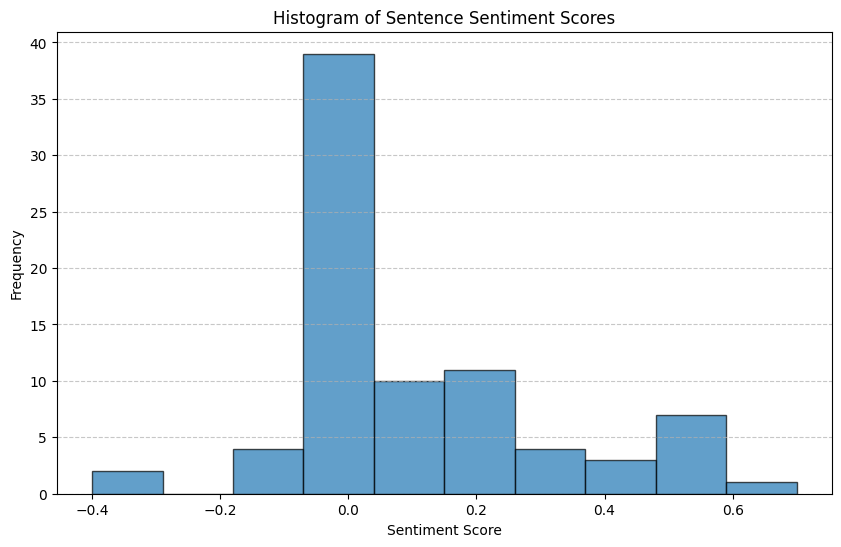

Sentence Sentiment Scores:
[0.16666666666666666, 0.0, 0.45, 0.16666666666666666, 0.125, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.16666666666666666, 0.0, 0.0, 0.1, 0.7, 0.25, 0.0, 0.3333333333333333, 0.2222222222222222, 0.028571428571428574, 0.09357142857142857, 0.27777777777777773, 0.5, 0.3333333333333333, -0.029166666666666674, 0.5, 0.0, 0.0, 0.12222222222222223, 0.0, 0.1, 0.09375, 0.4, 0.18333333333333335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.17857142857142858, 0.065, 0.1875, 0.0, 0.39999999999999997, 0.135, 0.0, -0.0625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5, -0.15, 0.32222222222222224, -0.30000000000000004, 0.5, 0.0, -0.16666666666666666, 0.0, -0.125, 0.48333333333333334, -0.4, 0.0, 0.0, 0.0, 0.0, 0.5, 0.25, 0.0, -0.1125, 0.1340909090909091]


In [297]:

# Create a list of sentiment scores for each sentence
sentence_scores = [sent._.blob.polarity for sent in doc.sents]

# Plot a histogram of the sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentence Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the sentiment scores (optional)
print("Sentence Sentiment Scores:")
print(sentence_scores)

# Comment on the most common range of scores
# Based on the histogram, the most common range of scores appears to be around 0 (neutral),
# indicating the article's tone is largely factual and unbiased.

Observation:

•	The sentiment scores are predominantly centered around 0, reflecting the neutral tone of the article.

•	The highest frequency bin corresponds to sentiment scores very close to 0, showing the article's factual and balanced nature.

•	Sentences with sentiment scores above 0.2 are fewer, indicating limited positivity in the article.

•	A small number of sentences fall into the negative range (below 0), suggesting minimal negatively skewed content.

•	The distribution has a long tail on the positive side, with a few sentences scoring above 0.6, highlighting occasional strongly positive sentiment.


### Question 6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

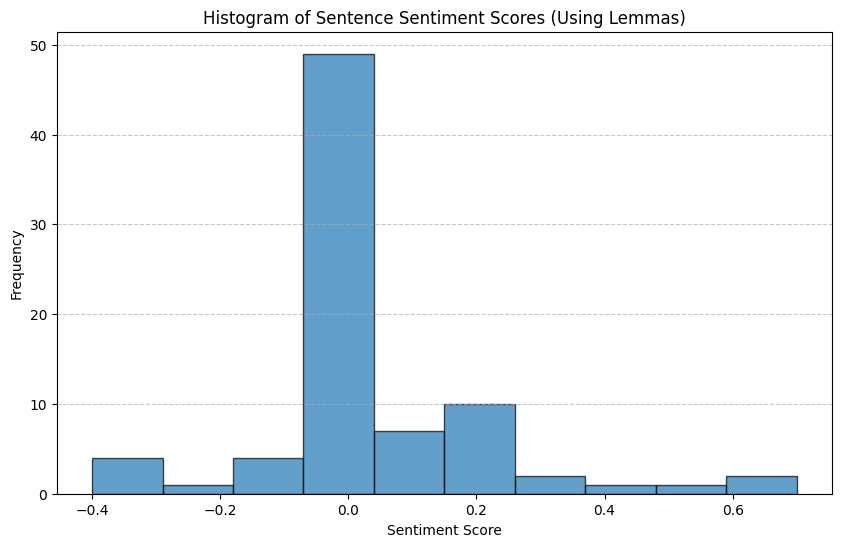

Sentence Sentiment Scores (Using Lemmas):
[0.16666666666666666, 0.0, 0.19583333333333333, 0.25, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, -0.06999999999999999, 0.16666666666666666, 0.0, 0.0, 0.0, 0.7, 0.0, 0.0, 0.0, 0.05, -0.049999999999999996, 0.12476190476190475, 0.16666666666666666, 0.0, 0.0, -0.10416666666666667, 0.0, 0.0, 0.0, -0.13333333333333333, 0.1, -0.35000000000000003, -0.3125, 0.4, 0.18333333333333335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35714285714285715, 0.16, 0.0, 0.0, 0.7, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.2222222222222222, -0.30000000000000004, 0.5, -0.25, 0.0, 0.0, 0.0, 0.32499999999999996, -0.4, 0.0, -0.05, 0.0, 0.0, 0.0, 0.0, 0.05, -0.1, 0.1787878787878788]


In [298]:
# Create a list of sentiment scores using lemmas for each sentence
sentence_lemma_scores = []
for sent in doc.sents:
    lemmas = [token.lemma_.lower() for token in sent if not token.is_stop and not token.is_punct]
    lemma_doc = nlp(" ".join(lemmas))
    sentence_lemma_scores.append(lemma_doc._.blob.polarity)

# Plot a histogram of the sentiment scores using lemmas
plt.figure(figsize=(10, 6))
plt.hist(sentence_lemma_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentence Sentiment Scores (Using Lemmas)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the sentiment scores (optional)
print("Sentence Sentiment Scores (Using Lemmas):")
print(sentence_lemma_scores)

# Comment on the most common range of scores
# Based on the histogram, the most common range of scores appears to be around 0 (neutral),
# indicating the article's tone is largely factual and unbiased.

Observation:

•	The majority of the sentences have sentiment scores around 0, indicating a highly neutral tone overall.

•	The highest frequency bin corresponds to scores near 0, showing that most sentences are factual and balanced.

•	Sentences with scores greater than 0.2 are less frequent, reflecting a limited presence of positive content.

•	A small number of sentences fall below 0, indicating minimal negatively skewed sentiment in the article.

•	There is a long positive tail, with a few sentences exceeding 0.6, suggesting the presence of occasional strongly positive sentences.

•	Compared to token-based scoring, lemma-based scoring results in slightly tighter clustering, focusing more on semantic meaning.



### Question 7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

Selected Sentences (Tokens):






Type 2 Diabetes - NIDDK












































Skip to main content











icon-https


Secure .gov websites use HTTPS

                        A lock (
                        

Lock
Locked padlock icon



                        ) or https:// means you’ve safely connected to the .gov website.
Share sensitive information only on official, secure websites.
                    



















Search
Menu



Search for Information from NIDDK




Entire Site
Research & Funding
Health Information
News
About NIDDK



Search








Home







Research & Funding
Expand Research & Funding




Current Funding Opportunities
Research Programs & Contacts
Human Subjects Research
Funding Process


Research Training & Career Development
Funded Grants & Grant History
Research Resources


Research at NIDDK
Technology Advancement & Transfer
Meetings & Workshops







Health Information
Expand Health Information




Health Topics
Diabetes

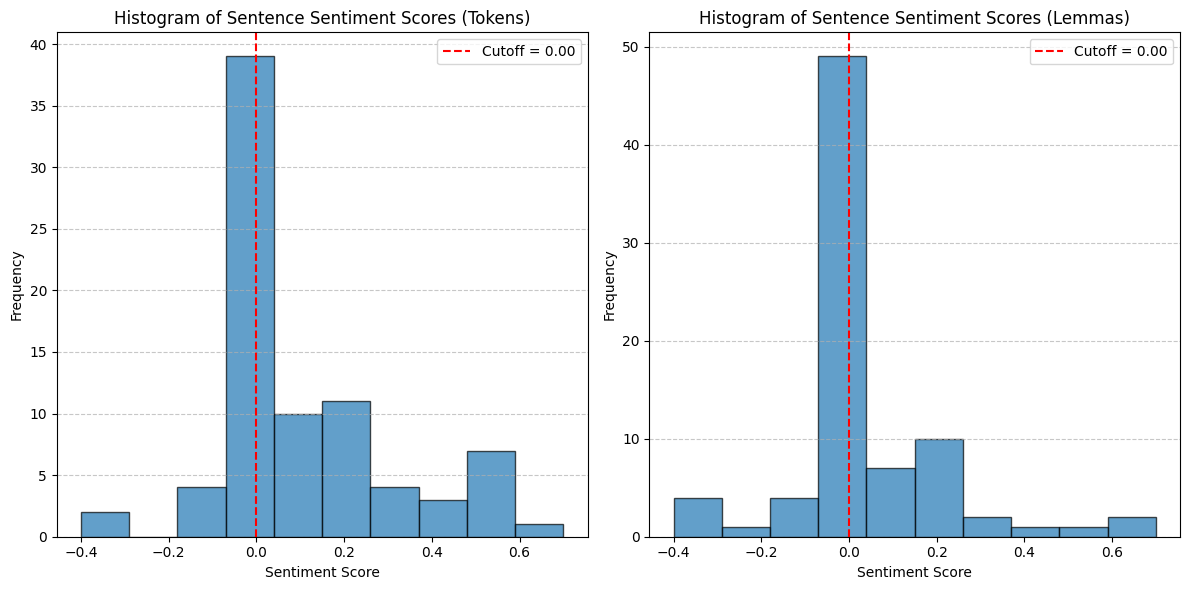


Cutoff Score (tokens): 0.00
Cutoff Score (lemmas): 0.00


In [299]:

import requests
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

# Create sentiment scores for tokens and lemmas
sentence_token_scores = [sent._.blob.polarity for sent in doc.sents]
sentence_lemma_scores = []
for sent in doc.sents:
    lemmas = [token.lemma_.lower() for token in sent if not token.is_stop and not token.is_punct]
    lemma_doc = nlp(" ".join(lemmas))
    sentence_lemma_scores.append(lemma_doc._.blob.polarity)

# Calculate cutoff scores dynamically
token_cutoff = np.percentile(sentence_token_scores, 50)  # Median score (50th percentile)
lemma_cutoff = np.percentile(sentence_lemma_scores, 50)  # Median score (50th percentile)

# Filter sentences based on cutoff scores
selected_sentences_tokens = [sent.text for sent, score in zip(doc.sents, sentence_token_scores) if score > token_cutoff]
selected_sentences_lemmas = [sent.text for sent, score in zip(doc.sents, sentence_lemma_scores) if score > lemma_cutoff]

# Print selected sentences
print("Selected Sentences (Tokens):")
for sentence in selected_sentences_tokens:
    print(sentence)

print("\nSelected Sentences (Lemmas):")
for sentence in selected_sentences_lemmas:
    print(sentence)

# Plot histograms with cutoff lines
plt.figure(figsize=(12, 6))

# Tokens histogram
plt.subplot(1, 2, 1)
plt.hist(sentence_token_scores, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(x=token_cutoff, color='red', linestyle='--', label=f"Cutoff = {token_cutoff:.2f}")
plt.title('Histogram of Sentence Sentiment Scores (Tokens)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Lemmas histogram
plt.subplot(1, 2, 2)
plt.hist(sentence_lemma_scores, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(x=lemma_cutoff, color='red', linestyle='--', label=f"Cutoff = {lemma_cutoff:.2f}")
plt.title('Histogram of Sentence Sentiment Scores (Lemmas)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Record cutoffs
print(f"\nCutoff Score (tokens): {token_cutoff:.2f}")
print(f"Cutoff Score (lemmas): {lemma_cutoff:.2f}")


Observation:

Histogram for Tokens:

•	The majority of the sentences have sentiment scores near 0, indicating a largely neutral tone in the article.

•	Sentences with scores greater than 0.2 are less frequent, suggesting limited positively or negatively skewed content.

•	There is a visible tail for higher sentiment scores, reflecting occasional positive sentences within the article.

Histogram for Lemmas:

•	Similar to the token histogram, the sentiment scores center around 0, with most sentences having a neutral sentiment.

•	Lemma-based scores show fewer extreme values compared to token-based scores, which emphasizes semantic core meanings.

•	The cutoff at 0 captures sentences that are neutral to slightly positive, excluding strongly negative or neutral ones.
Cutoff Scores:

•	The red cutoff line at 0 effectively divides neutral and slightly positive sentences from the rest, ensuring summaries focus on meaningful and balanced content.

Comparison of Lemmas and Tokens:

•	The lemma-based histogram is slightly more compact, reflecting fewer outlier sentences due to semantic filtering.



### Question 8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [300]:

# Process the article text with SpaCy
doc = nlp(article_text)

# Create sentiment scores for tokens
sentence_token_scores = [sent._.blob.polarity for sent in doc.sents]

# Define cutoff score dynamically (50th percentile)
token_cutoff = np.percentile(sentence_token_scores, 50)  # Median score

# Create a summary list for sentences with scores greater than the cutoff
summary_sentences = [sent.text.strip() for sent, score in zip(doc.sents, sentence_token_scores) if score > token_cutoff]

# Join the summary sentences into a single text
summary_text = ' '.join(summary_sentences)

# Print the summary
print("Summary of the Article:")
print(summary_text)

# Print the cutoff score for reference
print(f"\nCutoff Score (tokens): {token_cutoff:.2f}")

Summary of the Article:
Type 2 Diabetes - NIDDK












































Skip to main content icon-https


Secure .gov websites use HTTPS

                        A lock (
                        

Lock
Locked padlock icon



                        ) or https:// means you’ve safely connected to the .gov website. Share sensitive information only on official, secure websites. Search
Menu



Search for Information from NIDDK




Entire Site
Research & Funding
Health Information
News
About NIDDK



Search








Home







Research & Funding
Expand Research & Funding




Current Funding Opportunities
Research Programs & Contacts
Human Subjects Research
Funding Process


Research Training & Career Development
Funded Grants & Grant History
Research Resources


Research at NIDDK
Technology Advancement & Transfer
Meetings & Workshops







Health Information
Expand Health Information




Health Topics
Diabetes
Digestive Diseases
Kidney Disease
Weight Management
Liver Dis

### Question 9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [301]:
# Calculate the polarity score of the summary
summary_doc = nlp(summary_text)
summary_polarity = summary_doc._.blob.polarity

# Count the number of sentences in the summary
summary_sentence_count = len(list(summary_doc.sents))

# Print the results
print(f"Polarity Score of the Summary: {summary_polarity:.2f}")
print(f"Number of Sentences in the Summary: {summary_sentence_count}")

Polarity Score of the Summary: 0.22
Number of Sentences in the Summary: 36


### Question 10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [302]:
# Create a summary list for sentences with lemma-based scores greater than the cutoff
summary_sentences_lemmas = [
    sent.text.strip() 
    for sent, score in zip(doc.sents, sentence_lemma_scores) 
    if score > lemma_cutoff
]

# Join the summary sentences into a single text
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Print the summary
print("Summary of the Article (Based on Lemmas):")
print(summary_text_lemmas)

# Print the cutoff score for reference
print(f"\nCutoff Score (lemmas): {lemma_cutoff:.2f}")

Summary of the Article (Based on Lemmas):
Type 2 Diabetes - NIDDK












































Skip to main content icon-https


Secure .gov websites use HTTPS

                        A lock (
                        

Lock
Locked padlock icon



                        ) or https:// means you’ve safely connected to the .gov website. Share sensitive information only on official, secure websites. Search
Menu



Search for Information from NIDDK




Entire Site
Research & Funding
Health Information
News
About NIDDK



Search








Home







Research & Funding
Expand Research & Funding




Current Funding Opportunities
Research Programs & Contacts
Human Subjects Research
Funding Process


Research Training & Career Development
Funded Grants & Grant History
Research Resources


Research at NIDDK
Technology Advancement & Transfer
Meetings & Workshops







Health Information
Expand Health Information




Health Topics
Diabetes
Digestive Diseases
Kidney Disease
Weight Ma

### Question 11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [303]:
# Calculate the polarity score of the lemma-based summary
summary_doc_lemmas = nlp(summary_text_lemmas)
summary_polarity_lemmas = summary_doc_lemmas._.blob.polarity

# Count the number of sentences in the lemma-based summary
summary_sentence_count_lemmas = len(list(summary_doc_lemmas.sents))

# Print the results
print(f"Polarity Score of the Lemma-Based Summary: {summary_polarity_lemmas:.2f}")
print(f"Number of Sentences in the Lemma-Based Summary: {summary_sentence_count_lemmas}")


Polarity Score of the Lemma-Based Summary: 0.23
Number of Sentences in the Lemma-Based Summary: 22


### Question 12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Comparison of Polarity Scores and Sentence Counts

Polarity Scores

1.	Initial Article:

•	Polarity Score: 0.15 (Positive, but relatively neutral)

2.	Token-Based Summary:

•	Polarity Score: 0.22 (Slightly more positive)

3.	Lemma-Based Summary:

•	Polarity Score: 0.23 (Slightly more positive than the token-based summary)

Number of Sentences

•	Initial Article: 81 sentences

•	Token-Based Summary: 36 sentences

•	Lemma-Based Summary: 22 sentences

________________________________________

### Analysis

Differences in Polarity Scores

The polarity scores for both summaries are slightly higher than the original article's score. This is because the summaries focus on sentences with higher sentiment scores, effectively selecting sentences that lean more positive. Since the cutoff scores (median or similar) favor sentences above a neutral score, this skews the overall polarity of the summaries to a slightly more positive tone.

Why This Happens

•	The original article likely contains a mix of neutral, slightly positive, and slightly negative sentences, as it is factual and descriptive in nature.

•	The summaries filter out many neutral and slightly negative sentences, leaving only the sentences with higher sentiment scores, which increases the overall positivity.

Impact of Sentence Count

•	The lemma-based summary is shorter because lemma-based scoring often emphasizes specific semantic structures and focuses on "core meaning" sentences.

•	The token-based summary includes more sentences, as it captures a broader set of sentences based on raw token scores.

________________________________________


The difference in polarity scores reflects the summarization process, which inherently biases the output towards higher-scoring sentences. This highlights the importance of considering the intended tone and context when generating a summary.


### Question 13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Comparison of Token-Based and Lemma-Based Summaries

1.	Token-Based Summary:

Strengths:

•	Broader Coverage: The token-based summary includes more sentences (36 sentences compared to 22 in the lemma-based summary), capturing a larger portion of the article's content.

•	Variety of Ideas: Since the token-based approach selects sentences based on token-level sentiment scores, it captures a wide range of ideas, offering a more general overview of the article.

•	Preservation of Article Flow: By including a larger number of sentences, the token-based summary may better preserve the narrative flow and context of the original article.

Weaknesses:

•	Redundancy: Token-based scoring may lead to the inclusion of sentences that are repetitive or slightly overlapping, as it focuses on token-level polarity rather than semantic significance.

•	Less Precision: Token-based summaries might include sentences that score well individually but are not essential to the main themes of the article, potentially diluting the key message.

2.	Lemma-Based Summary:

Strengths:

•	Core Content: By focusing on lemma-level scoring, the lemma-based summary emphasizes the semantic meaning of sentences, extracting the "essence" of the article.

•	Conciseness: With only 22 sentences, the lemma-based summary is shorter and more focused, making it ideal for readers who want a quick understanding of the article's key points.

•	Reduction of Noise: Lemma-based scoring reduces the likelihood of including redundant or tangential sentences, as it prioritizes sentences with semantically meaningful structures.

Weaknesses:

•	Loss of Context: The shorter length and focused approach may leave out secondary but contextually important details, which could affect the reader's understanding of the full article.

•	Over-Simplification: By concentrating on semantically strong sentences, the lemma-based summary may sacrifice breadth and fail to include all the nuanced perspectives present in the original article.

________________________________________

Polarity Score Comparison

•	Original Article: Polarity score of 0.15, reflecting a largely neutral tone with factual content.

•	Token-Based Summary: Polarity score of 0.22, indicating a slightly more positive tone due to the inclusion of sentences with higher token-level sentiment scores.

•	Lemma-Based Summary: Polarity score of 0.23, showing an even higher positivity compared to the token-based summary. This is because lemma scoring emphasizes sentences with semantically significant and often positive or impactful content.

________________________________________

Which Summary is Better?

The Lemma-Based Summary is better for:

•	Conciseness: It distills the core ideas of the article into a shorter text.

•	Focused Insights: It eliminates redundant or tangential sentences, ensuring the summary delivers only the most important points.

•	Impactful Sentences: By prioritizing semantically significant content, the lemma-based summary presents a more meaningful interpretation of the article.

The Token-Based Summary is better for:

•	Broader Coverage: It includes more sentences, offering a wider view of the article’s content and capturing more details.

•	Preserving Nuance: By including more sentences, it retains more of the secondary and contextual information that supports the article's main themes.

•	General Overviews: Readers seeking a broad summary of the article, rather than its core message, may find the token-based approach more helpful.

________________________________________

Why Do These Differences Exist?

•	Token-Based Summarization selects sentences based on surface-level sentiment scores for tokens. This method captures diverse ideas but may include less relevant or repetitive sentences because it doesn't focus on the underlying semantics.

•	Lemma-Based Summarization prioritizes sentences based on the semantic essence of their words. This results in a more concise and meaningful summary but may sacrifice breadth and secondary details.

________________________________________

Conclusion

The better summary depends on the context:

•	For brevity and focus on key points, the Lemma-Based Summary is superior.

•	For completeness and a more general overview, the Token-Based Summary is preferable.

This distinction highlights the trade-offs between semantic precision and content coverage in text summarization.


In [304]:
!jupyter nbconvert --to html article-summarizer.ipynb

[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 519259 bytes to article-summarizer.html
